## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [2]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/GOOG_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [ ]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [4]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [5]:
merged_df.shape
merged_df.sample(5)

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
12575,Taiwan Life Insurance Co. Ltd. Submits Bid For...,https://www.benzinga.com/markets/company-news/...,Benzinga Staff 5,2010-01-13 00:00:00+00:00,MET,0.000000,2010-01-13 00:00:00+00:00,14.358431,14.654571,14.293923,14.622441,14.605821,260838034,0.0,0.0
353299,"BlackBerry 10 May Have Been an Enormous, Recor...",https://www.benzinga.com/analyst-ratings/analy...,Louis Bedigian,2013-02-20 00:00:00+00:00,BBRY,0.000000,2013-02-20 00:00:00+00:00,20.057320,20.148727,19.720831,19.737518,19.715084,110982436,0.0,0.0
92940,Concord Medical to Acquire a 52% Equity Intere...,https://www.benzinga.com/news/11/01/757548/con...,Benzinga Staff,2011-01-06 00:00:00+00:00,CCM,0.000000,2011-01-06 00:00:00+00:00,15.209989,15.403016,15.194298,15.280226,15.262857,82620526,0.0,0.0
1260902,Stocks That Hit 52-Week Highs On Tuesday,https://www.benzinga.com/news/20/01/15199704/s...,Lisa Levin,2020-01-28 00:00:00+00:00,BRO,0.000000,2020-01-28 00:00:00+00:00,72.150002,72.800003,71.623497,72.627998,72.545448,31548000,0.0,0.0
686870,From Yahoo Blog: 'Introducing the New Yahoo Ma...,https://www.benzinga.com/news/15/10/5916125/fr...,Paul Quintaro,2015-10-15 00:00:00+00:00,YHOO,0.068182,2015-10-15 00:00:00+00:00,32.733002,33.156502,32.723000,33.087002,33.049393,37714000,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [6]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1324417, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [7]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,Y,0.000000,2009-04-27 00:00:00+00:00,9.572619,9.700889,9.533018,9.612719,9.601792,91967429,0.0,0.0,NaN
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,FT,0.000000,2009-04-27 00:00:00+00:00,9.572619,9.700889,9.533018,9.612719,9.601792,91967429,0.0,0.0,0.000000
2,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00+00:00,A,0.000000,2009-04-29 00:00:00+00:00,9.613217,9.837377,9.609730,9.750204,9.739121,144941247,0.0,0.0,0.014302
3,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00+00:00,AM,0.000000,2009-05-22 00:00:00+00:00,9.879469,9.929034,9.763404,9.800764,9.789624,69001669,0.0,0.0,0.005186
4,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,2009-05-27 00:00:00+00:00,RF,0.268182,2009-05-27 00:00:00+00:00,10.103131,10.258050,10.082458,10.101138,10.089657,121826932,0.0,0.0,0.030648


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [8]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.0017591308439439265, p-value: 0.042922326776410946


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [9]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.0009247145388941313, p-value: 0.28724218715412064


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [10]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.0008530681192177873, p-value: 0.28724168958900564


The results show the following correlation values between news sentiment and daily stock return for GOOG:

- **Pearson correlation:** 0.0017 (p-value: 0.0429)
- **Spearman correlation:** 0.00092 (p-value: 0.2872)
- **Kendall correlation:** 0.00085 (p-value: 0.2872)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

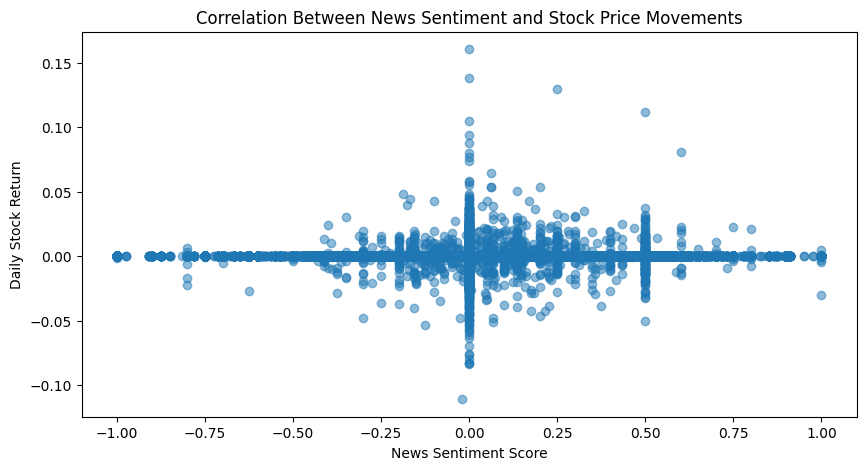

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

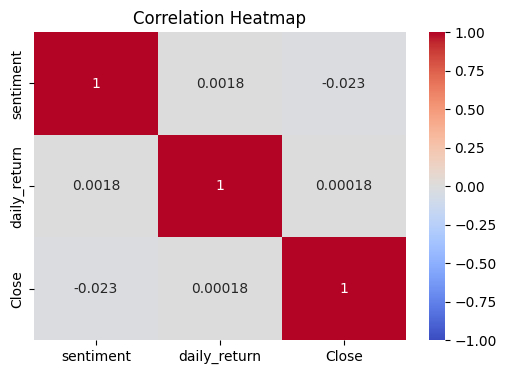

In [12]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()